In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pokemon_df = pd.read_csv('/content/Pokemon.csv')


In [ ]:
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


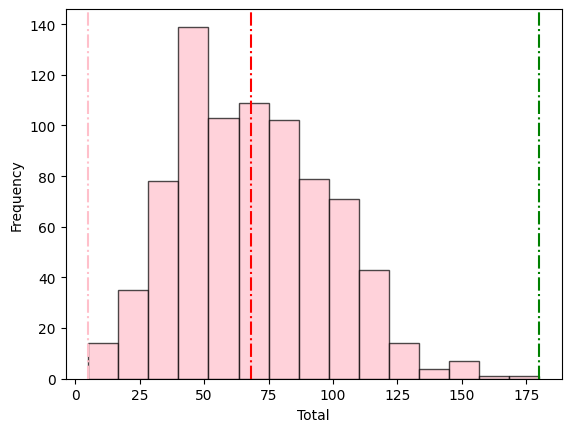

In [ ]:
plt.hist(pokemon_df['Speed'], bins = 15, color='pink', edgecolor='black', alpha=0.7)
plt.xlabel('Total')
plt.ylabel('Frequency')

#avg line
plt.axvline(pokemon_df['Speed'].mean(), linestyle='dashdot', color='red')

#min line
plt.axvline(pokemon_df['Speed'].min(), linestyle='dashdot', color='pink')

#max line
plt.axvline(pokemon_df['Speed'].max(), linestyle='dashdot', color='green')


##CORRELATION

Text(0, 0.5, 'Defense')

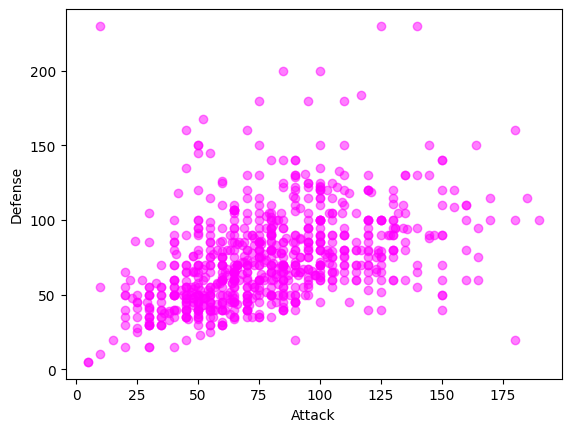

In [ ]:
#scatter plot for attack and defense

plt.scatter(pokemon_df['Attack'], pokemon_df['Defense'], color = 'magenta', alpha=0.5)
plt.xlabel('Attack')
plt.ylabel('Defense')


Text(0.5, 1.0, 'Scatter plot')

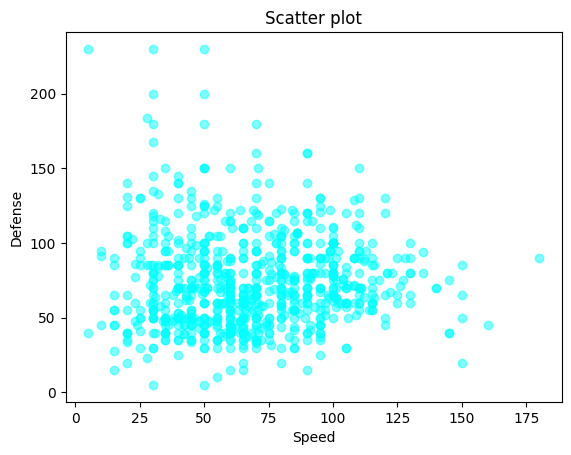

In [ ]:
#scatter plot for variables speed and defense

plt.scatter(pokemon_df['Speed'], pokemon_df['Defense'], color = 'cyan', alpha=0.5)
plt.xlabel('Speed')
plt.ylabel('Defense')
plt.title('Scatter plot')

Text(0.5, 1.0, 'Scatter plot')

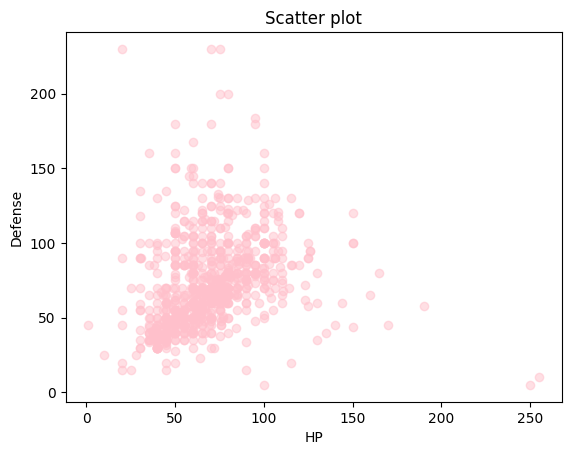

In [ ]:
#scatter plot for variables HP and defense

plt.scatter(pokemon_df['HP'], pokemon_df['Defense'], color = 'pink', alpha=0.5)
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('Scatter plot')

##Pearson correlation

In [ ]:
#Result of this correlation calculation is between -1 and 1.
#-1 perfect negative relationship
# 1 perfect positive relationship


In [ ]:
#Pearson correlation between Attack/Defense

correlation1 = pokemon_df['Attack'].corr(pokemon_df['Defense'])
correlation1

0.4386870551184892

In [ ]:
#Pearson correlation between Speed/Defense

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
correlation2

0.015226598088597448

In [ ]:
#Select only numeric columns

numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1) #axis=1 means we want to drop a column, not a row
numeric_columns

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [ ]:
target_column = 'Attack'
correlation_results = {} #key = column, val=pearson_correlation
for column in numeric_columns:
  if column != target_column:
    correlation = pokemon_df[target_column].corr(pokemon_df[column])
    print(f'The correlation betwwen {target_column} and {column} is {correlation}.')
    correlation_results[column] = correlation

print(correlation_results)

The correlation betwwen Attack and Total is 0.7362106519949293.
The correlation betwwen Attack and HP is 0.422386028776223.
The correlation betwwen Attack and Defense is 0.4386870551184892.
The correlation betwwen Attack and Sp. Atk is 0.396361755349232.
The correlation betwwen Attack and Sp. Def is 0.26398955110108846.
The correlation betwwen Attack and Speed is 0.38123973924108967.
The correlation betwwen Attack and Generation is 0.051451336708469686.
{'Total': 0.7362106519949293, 'HP': 0.422386028776223, 'Defense': 0.4386870551184892, 'Sp. Atk': 0.396361755349232, 'Sp. Def': 0.26398955110108846, 'Speed': 0.38123973924108967, 'Generation': 0.051451336708469686}


In [ ]:
# Select only numeric columns

numeric_columns = pokemon_df.select_dtypes(include=['number'])
numeric_columns = numeric_columns.drop('#', axis=1)
numeric_columns
target_column = 'Attack'
correlation_results = {} #key = column, val=pearson_correlation

# for loop comparing target column and all other columns in the DataFrame

for col in numeric_columns.columns:
  if col =='Attack':
    continue
  correlation = pokemon_df[target_column].corr(pokemon_df[col])
  correlation_results[col] = correlation

correlation_results

{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

##Correlation matrix

In [ ]:
correlation_matrix = numeric_columns.corr()
correlation_matrix

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


##Visualizing with seaborn

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation matrix')

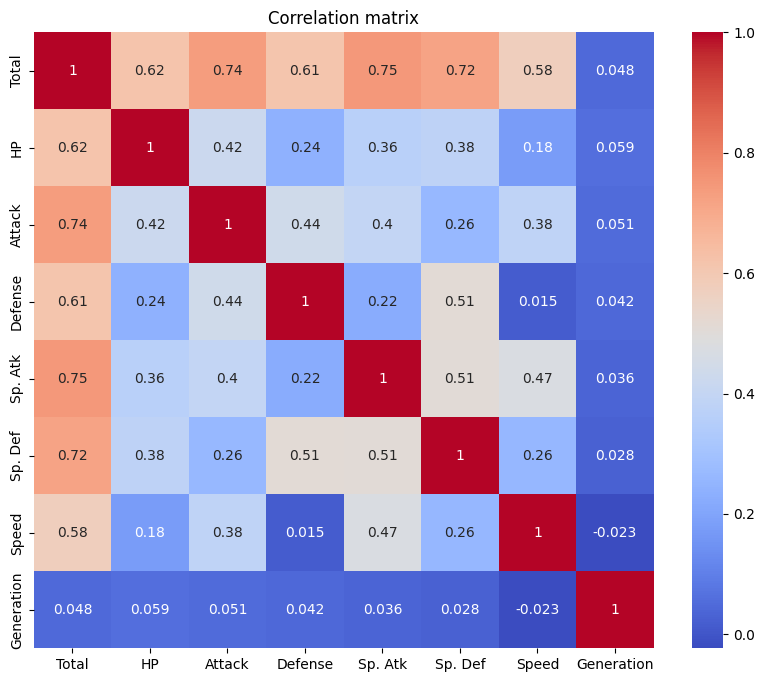

In [ ]:
plt.figure(figsize =(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm') #annotating = adding values
plt.title('Correlation matrix')


##Linear regression (predict one value based on the other)

Pearson correlation coefficient: 0.015226598088597448


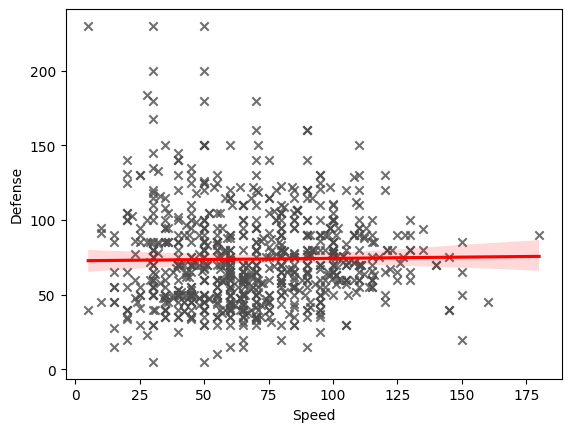

In [ ]:
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

correlation2 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation2)

# Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.
1. Create two DataFrame Grass and Water
2. Create the regression plots for each (Grass and Water)
3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)
4. Explain to each other what do you see and what it means.

Pearson correlation coefficient: 0.5407436570609248


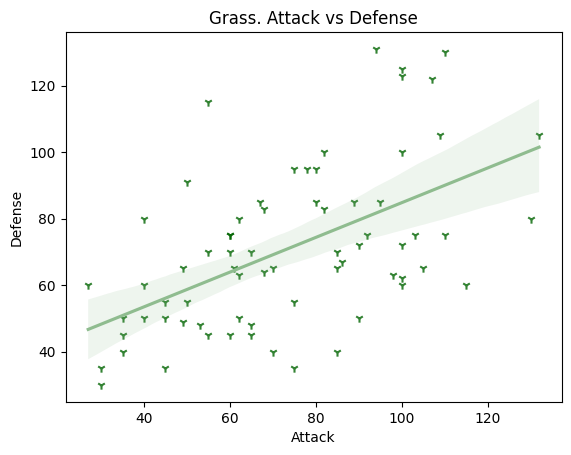

In [ ]:
#1
grass_pokemons = pokemon_df[pokemon_df['Type 1'] == 'Grass']
water_pokemons = pokemon_df[pokemon_df['Type 1'] == 'Water']
#2 #3 for the Grass Type 1 pokemons
sns.regplot(x='Attack', y='Defense', data=grass_pokemons, color='darkgreen', marker='1', line_kws={'color':'darkseagreen'})
plt.title('Grass. Attack vs Defense')
print(f'Pearson correlation coefficient: {grass_pokemons["Attack"].corr(grass_pokemons["Defense"])}')

Pearson correlation coefficient: 0.5161628601933552


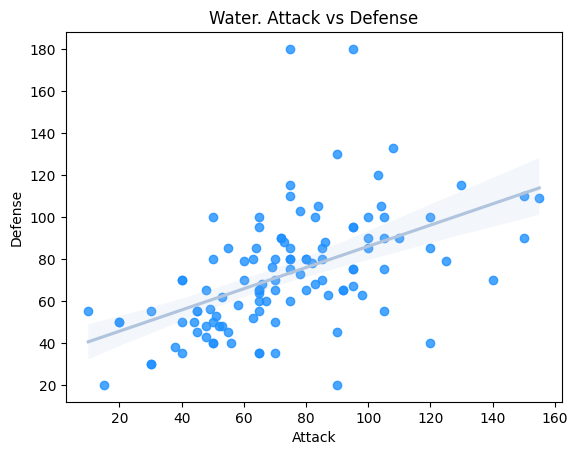

In [ ]:
#2 #3 for the Water Type 1 pokemons
sns.regplot(x='Attack', y='Defense', data=water_pokemons, color='dodgerblue', marker='o', line_kws={'color':'lightsteelblue'})
plt.title('Water. Attack vs Defense')
print(f'Pearson correlation coefficient: {water_pokemons["Attack"].corr(water_pokemons["Defense"])}')